In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(linewidth=100000, precision=3)
import sys
import pandas as pd

from skimage import data, io, filters
from skimage.transform import resize


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#data = tfds.load('fashion_mnist')


In [ ]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJGCMA9/fashion_mnist-train.tfrecord


  0%|          | 0/60000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteJGCMA9/fashion_mnist-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
img_train.shape

(60000, 28, 28, 1)

### Data reshaping

In [ ]:
img_train = img_train.reshape((60000, 28, 28))
nsamples, nx, ny = img_train.shape
img_train = img_train.reshape(nsamples, nx * ny)
print(img_train.shape)
print(img_train[0])

(60000, 784)
[  0   0   0   0   0   0   0   0   0  18  77 227 227 208 210 225 216  85  32   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  61 100  97  80  57 117 227 238 115  49  78 106 108  71   0   0   0   0   0   0   0   0   0   0   0   0   0  81 105  80  69  72  64  44  21  13  44  69  75  75  80 114  80   0   0   0   0   0   0   0   0   0   0   0  26  92  69  68  75  75  71  74  83  75  77  78  74  74  83  77 108  34   0   0   0   0   0   0   0   0   0   0  55  92  69  74  74  71  71  77  69  66  75  74  77  80  80  78  94  63   0   0   0   0   0   0   0   0   0   0  63  95  66  68  72  72  69  72  74  74  74  75  75  77  80  77 106  61   0   0   0   0   0   0   0   0   0   0  80 108  71  69  72  71  69  72  75  75  72  72  75  78  72  85 128  64   0   0   0   0   0   0   0   0   0   0  88 120  75  74  77  75  72  77  74  74  77  78  83  83  66 111 123  78   0   0   0   0   0   0   0   0   0   0  85 134  74  85  69  75  75  74  75  74  75  75  81  75  61 151 115  9

In [ ]:
nsamples, nx, ny, _ = img_test.shape
img_test = img_test.reshape(nsamples, nx * ny)
print(img_test.shape)

(10000, 784)


In [ ]:
print(img_train[0])

In [ ]:
print(img_train[0].shape)
print(type(img_train))
print(img_train[0].reshape((28,28)).shape)
#np.array_repr(img_train[0].reshape((28,28))).replace('\n', '')
#print(img_train[0].reshape((28,28)))
#pd.DataFrame(img_train[0].reshape((28,28)))


(28, 28, 1)
<class 'numpy.ndarray'>
(28, 28)


## Data Exploration

### plotting means across ax 0 vs ax1 of each *class*

['b', 'g', 'r', 'c', 'm', 'y', 'k']
(1000, 784)


KeyboardInterrupt: ignored

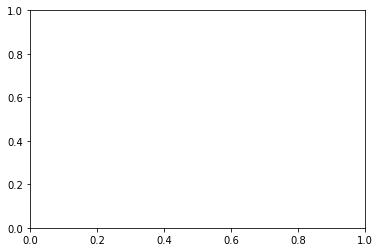

In [ ]:
"""testing the optimal svm params"""
# prepare the test and training data by resizing them
"""training data"""

fiq, ax = plt.subplots(1,1)

features_1_train = []
features_2_train = []
colors = [c for c in "bgrcmyk"]
print(colors)
for c in range(4,6):
    #iterate over all the possible classes in training data and extract the means and cov of each one from the 7x7 rescaled data
    c_data = img_train[label_train == c]
    c_data = c_data[:1000,:] #take first couple of samples
    nsamples, nx, ny, _ = c_data.shape
    c_data = c_data.reshape(nsamples,nx*ny)
    pca = PCA(n_components='mle')
    print(c_data.shape)
    pca_data = pca.fit_transform(c_data)
    f1 = np.array([np.var(obj.reshape(nx, ny), axis=0) for obj in c_data])
    f2 = np.array([np.var(obj.reshape(nx, ny), axis=1) for obj in c_data])
    ax.scatter(f1, f2, color=colors[c], label=f"class: {c}")

### Trying out SVD on shirt

(28, 28)
(28, 1)
(28, 28)


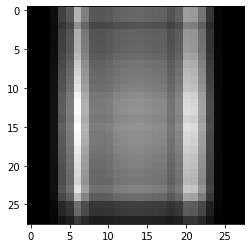

In [ ]:
im = img_train[0].reshape((28,28))
U,S,V = np.linalg.svd(im, full_matrices=False)
S = np.diag(S)
print(im.shape)
k=1
print(U[:,:k].shape)
compressed_img = U[:,:k] @ S[0:k,:k] @ V[:k,:]
print(compressed_img.shape)
plt.imshow(compressed_img, cmap='gray')

### Trying out PCA on shirt

10
(28, 10)


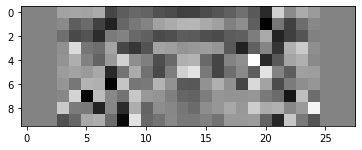

In [ ]:
img = img_train[0].reshape((28,28))

pca = PCA(n_components=10)
pca_img = pca.fit_transform(img)
print(len(pca.components_))
print(pca_img.shape)
reduced_img = pca.inverse_transform(pca_img)
plt.imshow(pca.components_, cmap='gray')

15
(28, 15)


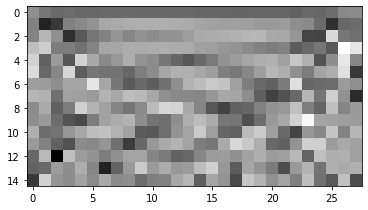

In [ ]:
img = img_train[2].reshape((28,28))

pca = PCA(n_components=15)
pca_img = pca.fit_transform(img)
print(len(pca.components_))
print(pca_img.shape)
plt.imshow(pca.components_, cmap='gray')

20
(28, 20)


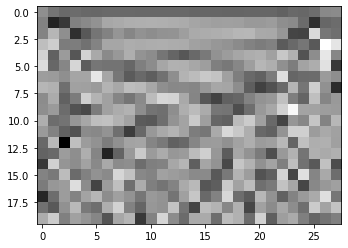

In [ ]:
img = img_train[2].reshape((28,28))

pca = PCA(n_components=20)
pca_img = pca.fit_transform(img)
print(len(pca.components_))
print(pca_img.shape)
plt.imshow(pca.components_, cmap='gray')

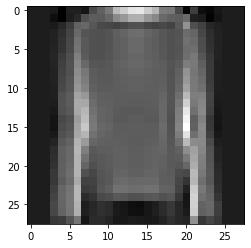

In [ ]:
img = img_train[0].reshape((28,28))

pca = PCA(n_components=3)
pca_img = pca.fit_transform(img)
reduced_img = pca.inverse_transform(pca_img)
plt.imshow(reduced_img, cmap='gray')

10
(28, 10)


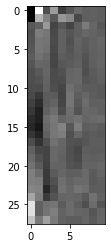

In [ ]:
img = img_train[0].reshape((28,28))

pca = PCA(n_components=10)
pca_img = pca.fit_transform(img)
print(len(pca.components_))
print(pca_img.shape)
reduced_img = pca.inverse_transform(pca_img)
plt.imshow(pca_img, cmap='gray')

(2, 28)
(28, 2)


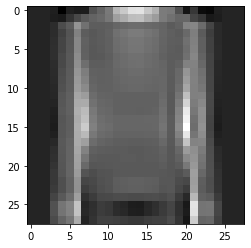

In [ ]:
img = img_train[0].reshape((28,28))

pca = PCA(n_components=2)
pca_img = pca.fit_transform(img)
print(pca.components_.shape)
print(pca_img.shape)
reduced_img = pca.inverse_transform(pca_img)
plt.imshow(reduced_img.reshape(28,28), cmap='gray')

(2, 28)
(28, 2)


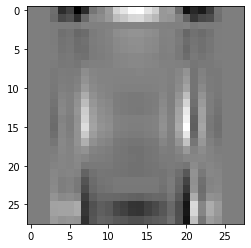

In [ ]:
img = img_train[0].reshape((28,28))

pca = PCA(n_components=2)
pca_img = pca.fit_transform(img)
print(pca.components_.shape)
print(pca_img.shape)
dot = pca_img.dot(pca.components_)
reduced_img = pca.inverse_transform(pca_img)
plt.imshow(reduced_img.reshape(28,28), cmap='gray')
plt.imshow(dot, cmap='gray')

iamge shape: (784,)
shirts data shape: (6000, 28, 28, 1)
explained variance: [0.398 0.088 0.064 0.045 0.025 0.022 0.02  0.017 0.015 0.011 0.011 0.011 0.009 0.008 0.007]
sum of variance: 0.7509759386701371
(6000, 15)


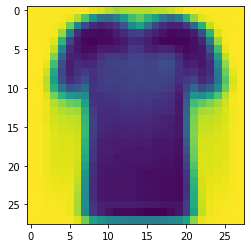

In [ ]:
img = img_train[0].reshape(28*28)
#img = img[:,np.newaxis]
print(f"iamge shape: {img.shape}")
shirts = img_train[label_train == 0]
print(f"shirts data shape: {shirts.shape}")
shirts = shirts.reshape(shirts.shape[0], 28*28)
pca = PCA(n_components=15)
pca_img = pca.fit_transform(shirts)
print(f"explained variance: {pca.explained_variance_ratio_}")
print(f"sum of variance: {np.sum(pca.explained_variance_ratio_)}")
print(pca_img.shape)
plt.imshow(pca.components_[0].reshape(28,28))

[0.46  0.198 0.115 0.092 0.049 0.026 0.02  0.016 0.012 0.006]
0.9937353251232923
(28, 10)


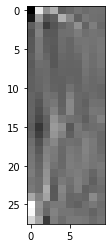

In [ ]:
img = img_train[0].reshape((28,28))
std = StandardScaler()
transformed_img = std.fit_transform(img)

pca = PCA(n_components=10)
pca_img = pca.fit_transform(transformed_img)
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca_img.shape)
plt.imshow(pca_img, cmap='gray')

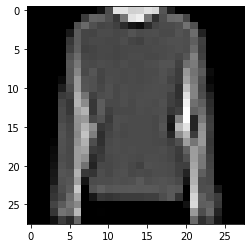

In [ ]:
plt.imshow(img_train[0].reshape((28,28)), cmap='gray')

### Trying out SVD on Pants

(28, 28)
(28, 2)
(28, 28)


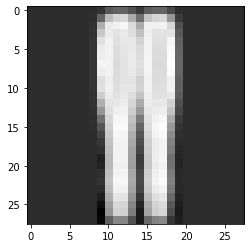

In [ ]:
im = img_train[1].reshape((28,28))
U,S,V = np.linalg.svd(im, full_matrices=False)
S = np.diag(S)
print(im.shape)
k=2
print(U[:,:k].shape)
compressed_img = U[:,:k] @ S[0:k,:k] @ V[:k,:]
print(compressed_img.shape)
plt.imshow(compressed_img, cmap='gray')

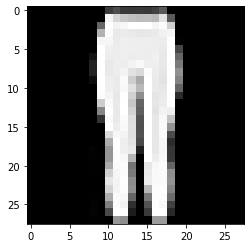

In [ ]:
plt.imshow(img_train[1].reshape((28,28)), cmap='gray')

### Trying out SVD on Pants

(28, 28)
(28, 1)
(28, 28)


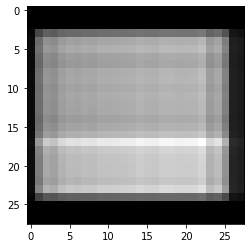

In [ ]:
im = img_train[2].reshape((28,28))
U,S,V = np.linalg.svd(im, full_matrices=False)
S = np.diag(S)
print(im.shape)
k=1
print(U[:,:k].shape)
compressed_img = U[:,:k] @ S[0:k,:k] @ V[:k,:]
print(compressed_img.shape)
plt.imshow(compressed_img, cmap='gray')

### Trying out image filtering

shirt org dim: (28, 28)
conv shirt dim: (28, 28)


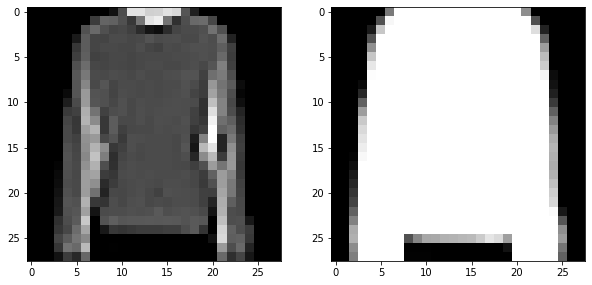

In [ ]:
kernel = np.ones((3, 3), np.float32)
shirt = img_train[0].reshape((28,28))
conv_shirt = cv2.filter2D(shirt, -1, kernel)
print(f"shirt org dim: {shirt.shape}")
print(f"conv shirt dim: {conv_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(shirt, cmap="gray")
ax[1].imshow(conv_shirt, cmap="gray")

### SVD to filtered shirt

(28, 28)
(28, 3)
(28, 28)


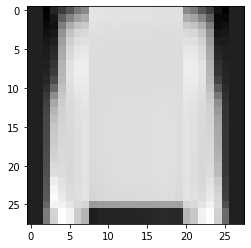

In [ ]:
im = conv_shirt
U,S,V = np.linalg.svd(im, full_matrices=False)
S = np.diag(S)
print(im.shape)
k=3
print(U[:,:k].shape)
compressed_img = U[:,:k] @ S[0:k,:k] @ V[:k,:]
print(compressed_img.shape)
plt.imshow(compressed_img, cmap='gray')

### Trying out image transform to a smaller size

shirt org dim: (28, 28)
resized_shirt dim: (10, 10)


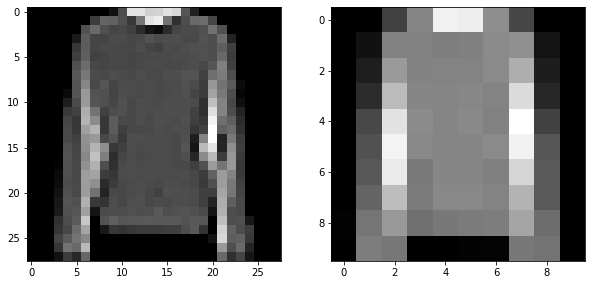

In [ ]:
shirt = img_train[0].reshape((28,28))
resized_shirt = resize(shirt, (10,10))
print(f"shirt org dim: {shirt.shape}")
print(f"resized_shirt dim: {resized_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(shirt, cmap="gray")
ax[1].imshow(resized_shirt, cmap="gray")

shirt org dim: (28, 28)
resized_shirt dim: (7, 7)


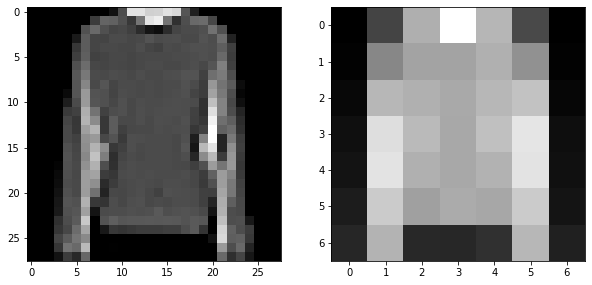

In [ ]:
shirt = img_train[0].reshape((28,28))
resized_shirt = resize(shirt, (7,7))
print(f"shirt org dim: {shirt.shape}")
print(f"resized_shirt dim: {resized_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(shirt, cmap="gray")
ax[1].imshow(resized_shirt, cmap="gray")

shirt org dim: (28, 28)
resized_shirt dim: (5, 5)


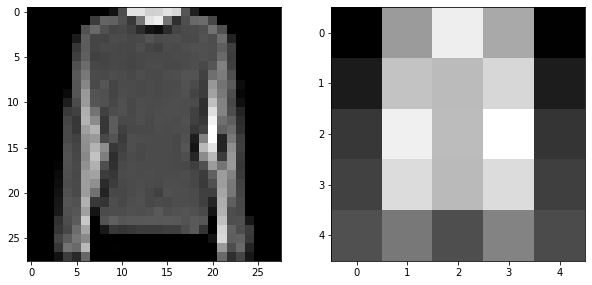

In [ ]:
shirt = img_train[0].reshape((28,28))
resized_shirt = resize(shirt, (5,5))
print(f"shirt org dim: {shirt.shape}")
print(f"resized_shirt dim: {resized_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(shirt, cmap="gray")
ax[1].imshow(resized_shirt, cmap="gray")

#### Further reduction in size

shirt org dim: (28, 28)
resized_shirt dim: (2, 2)


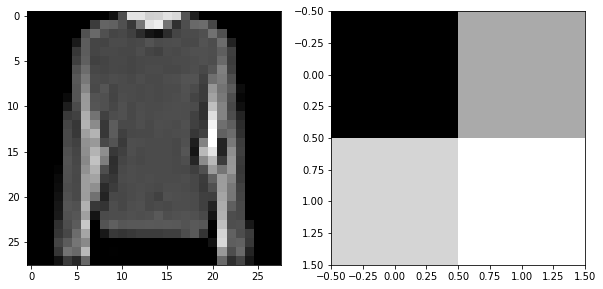

In [ ]:
shirt = img_train[0].reshape((28,28))
resized_shirt = resize(shirt, (2,2))
print(f"shirt org dim: {shirt.shape}")
print(f"resized_shirt dim: {resized_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(shirt, cmap="gray")
ax[1].imshow(resized_shirt, cmap="gray")

[[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.231e-01 5.158e-01 4.752e-01 4.783e-01 4.814e-01 7.647e-03 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 2.541e-02 8.444e-01 9.401e-01 9.543e-01 9.483e-01 9.180e-01 4.447e-02 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 5.059e-02 9.403e-01 9.288e-01 9.278e-01 9.261e-01 9.290e-01 1.026e-01 8.715e-05 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 1.351e-04 1.079e-01 9.300e-01 9.294e-01 9.263e-01 9.323e-01 9.228e-01 3.714e-01 7.887e-04 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 2.614e-04 1.561e-01 9.219e-01 9.369e-01 8.749e-01 9.507e-01 9.162e-01 4.905e-01 1.033e-03 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.200e-02 9.342e-01 9.453e-01 7.899e-01 9.507e-01 9.150e-01 3.812e-01 8.148e-04 0.000e+00 0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 4.624e-02 9.244e-01 9.535e-01 6.493e-01 

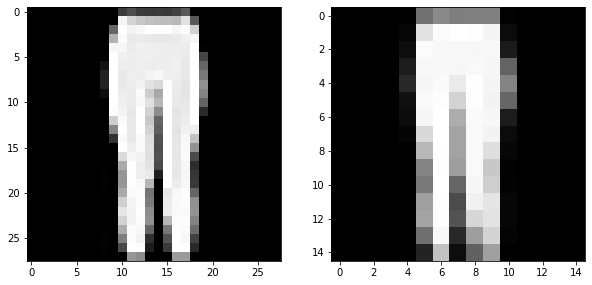

In [ ]:
pants = img_train[1].reshape((28,28))
resized_pants = resize(pants, (15,15))
print(resized_pants)
print(f"shirt org dim: {shirt.shape}")
print(f"resized_shirt dim: {resized_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(pants, cmap="gray")
ax[1].imshow(resized_pants, cmap="gray")

[[  0   0   0   0   0   0   0   0   0   0  59  77  58  56  58  57  65  89   2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 245 213 199 192 188 189 184 226  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 101 255 242 247 255 255 255 245 252 208   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 233 235 233 231 232 234 241 245   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 246 246 235 240 238 237 238 237 236 255   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 239 237 239 239 238 237 238 234 255  70   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  18 255 237 237 238 236 237 237 241 232 255 102   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 255 232 238 237 243 248 238 238 232 255 121   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  35 255 233 237 244 226 217 252 236 229 255 14

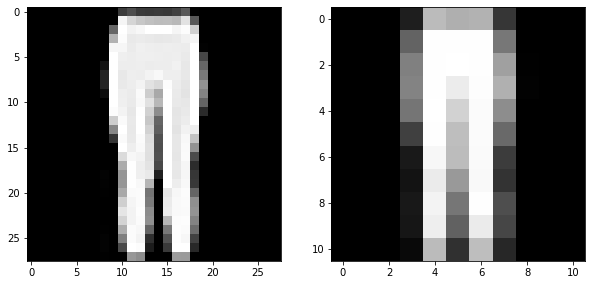

In [ ]:
sc = StandardScaler()
pants = img_train[1].reshape((28,28))
print(pants)
norm_pants = pants / 255#sc.fit_transform(pants)
print(norm_pants)
resized_pants = resize(norm_pants, (11,11))
print(resized_pants)
print(f"shirt org dim: {shirt.shape}")
print(f"resized_shirt dim: {resized_shirt.shape}")
fig, ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(pants, cmap="gray")
ax[1].imshow(resized_pants, cmap="gray")

### Random Forest avec PCA

In [ ]:
#normalize training data
sc = StandardScaler()
print(img_train.shape)
Xtr = sc.fit_transform(img_train)
Xte = sc.transform(img_test)


(60000, 784)


In [ ]:
#apply PCA
pca = PCA(n_components=10)
Xtr = pca.fit_transform(Xtr)
Xte = pca.transform(Xte)

In [ ]:
# Random forest model
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(Xtr, label_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
y_pred = classifier.predict(Xte)

In [ ]:
cm = confusion_matrix(label_test, y_pred)
print(cm)
print( accuracy_score(label_test, y_pred))

[[706   5  73  81   6  35  31   0  12  51]
 [ 11 845  28  91   0   2  11   0   5   7]
 [ 96   1 755   2  32  13   3   0  71  27]
 [ 19 113 108 542  13  18  62   0  13 112]
 [  5   2 592  18 117  19  19   0 136  92]
 [  1   1  53   0   4 689   1 159  24  68]
 [200   3 528  26  23  53  32   0  73  62]
 [  0   0   2   0   3 140   0 717   1 137]
 [ 25   1  91   6  13  20  18  11 757  58]
 [  0   0  22   0   2  66   1  24  17 868]]
0.6028


### Do n_components grid search

In [ ]:
print(Xtr.shape)

(60000, 2)


(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)
(60000, 784)


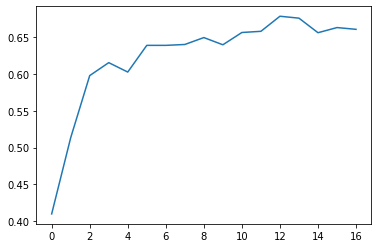

In [ ]:
components = [2,4,6,8,10,12,15,17,20,25,40,100,150,250,500,600,700]
accuracies = np.zeros(len(components))
for i,comp in enumerate(components):
  #normalize
  sc = StandardScaler()
  print(img_train.shape)
  Xtr = sc.fit_transform(img_train)
  Xte = sc.transform(img_test)
  #apply PCA
  pca = PCA(n_components=comp)
  Xtr = pca.fit_transform(Xtr)
  Xte = pca.transform(Xte)

  # Random forest model
  classifier = RandomForestClassifier(max_depth=2, random_state=0)
  classifier.fit(Xtr, label_train)

  y_pred = classifier.predict(Xte)
  accuracies[i] = accuracy_score(label_test, y_pred)
x = np.arange(len(components))
fig, ax = plt.subplots()
ax.plot(x,accuracies)

In [ ]:
sc = StandardScaler()
print(img_train.shape)
Xtr = sc.fit_transform(img_train)
Xte = sc.transform(img_test)
#apply PCA
pca = PCA(n_components=150)
Xtr = pca.fit_transform(Xtr)
Xte = pca.transform(Xte)
print(Xtr.shape)



(60000, 784)
(60000, 150)


In [ ]:
classifier = RandomForestClassifier(max_depth=10, random_state=0)
classifier.fit(Xtr, label_train)

y_pred = classifier.predict(Xte)
print(accuracy_score(label_test, y_pred))

0.8182


In [ ]:
classifier = RandomForestClassifier(max_depth=20, random_state=0)
classifier.fit(Xtr, label_train)

y_pred = classifier.predict(Xte)
print(accuracy_score(label_test, y_pred))

0.8618


In [ ]:
classifier = RandomForestClassifier(max_depth=40, random_state=0)
classifier.fit(Xtr, label_train)

y_pred = classifier.predict(Xte)
print(accuracy_score(label_test, y_pred))

0.8611


In [ ]:
classifier = RandomForestClassifier(max_depth=40, random_state=0)
classifier.fit(Xtr, label_train)

y_pred = classifier.predict(Xte)
print(accuracy_score(label_test, y_pred))

### Random Forest no PCA

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(img_train, label_train)

y_pred = classifier.predict(img_test)
print(accuracy_score(label_test, y_pred))

0.5892


In [ ]:
classifier = RandomForestClassifier(max_depth=40, random_state=0)
classifier.fit(img_train, label_train)

y_pred = classifier.predict(img_test)
print(accuracy_score(label_test, y_pred))

0.8768


# Notes
### Data augmentation
- Rotate the images to augment the data set
- Shift and contour the images to augment the data set

### Considerations
- Using pretrained models vs from scratch